In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/adult-census-income


### Introduction

The goal of this project is to predict whether an individual's annual income exceeds $50,000 using the "Adult" dataset from the 1994 Census Bureau.
- The performance of four machine learning models—Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM)—will be developed and compared. 
-  Data preprocessing, model training, evaluation, and comparison will be conducted to identify the best-performing model for this classification task.

### Objectives

1. **Data Preprocessing**: Clean and encode data and handle missing values.
2. **Model Development**: Implement Logistic Regression, K-Nearest Neighbors (KNN),and Support Vector Machine (SVM).
3. **Model Training and Evaluation**: Train models on the training set and evaluate performance using metrics like accuracy, precision, recall, and F1-score.
4. **Model Comparison**: Compare models to identify the best performer.
5. **Conclusion**: Summarized findings and provided recommendations for improvement.

*The dataset and results are used for educational purposes, demonstrating the application of advanced machine learning techniques on real-world data. We aim to build effective machine learning models to predict adults income and gain a deeper understanding of machine learning techniques.*

### About the Dataset

The dataset is a commonly used dataset known as the "Adult" dataset or "Census Income" dataset. It is primarily used for machine learning tasks, particularly classification. The goal is often to predict whether an individual earns more than $50,000 a year based on various demographic and employment-related attributes

The dataset is available on [UCI Machine Learning Repository](https://www.kaggle.com/datasets/uciml/adult-census-income)

**Dataset:** Census Adult Income

- **Content**: Data on various demographic and employment-related attributes of individuals.
- **Number of Rows**: 32,561
- **Number of Columns**: 15

**INPUTS**

| No | Feature            | Description                                                                              |
|----|--------------------|------------------------------------------------------------------------------------------|
| 1  | **age**            | Integer value representing the age of the individual.                                    |
| 2  | **workclass**      | Categorical variable indicating the type of employer (e.g., Private, Self-emp-not-inc, etc.). |
| 3  | **fnlwgt**         | Continuous variable representing the final weight, which is a proxy for the number of people represented by the individual. |
| 4  | **education**      | Categorical variable indicating the highest level of education achieved (e.g., Bachelors, HS-grad, etc.). |
| 5  | **education.num**  | Integer value representing the numerical encoding of education levels.                   |
| 6  | **marital.status** | Categorical variable indicating the marital status of the individual (e.g., Married-civ-spouse, Divorced, etc.). |
| 7  | **occupation**     | Categorical variable representing the individual's occupation (e.g., Tech-support, Craft-repair, etc.). |
| 8  | **relationship**   | Categorical variable representing the individual's relationship status within a family (e.g., Wife, Own-child, etc.). |
| 9  | **race**           | Categorical variable indicating the race of the individual (e.g., White, Black, etc.).   |
| 10 | **sex**            | Categorical variable indicating the gender of the individual (Male or Female).           |
| 11 | **capital.gain**   | Continuous variable representing the capital gains received by the individual.           |
| 12 | **capital.loss**   | Continuous variable representing the capital losses incurred by the individual.          |
| 13 | **hours.per.week** | Continuous variable indicating the number of hours the individual works per week.        |
| 14 | **native.country** | Categorical variable representing the country of origin for the individual (e.g., United-States, Mexico, etc.). |
| 15 | **income**         | Categorical variable indicating the income category of the individual (<=50K or >50K).   |

*The dataset is often used for predictive modeling to understand how different demographic and employment factors relate to income levels. It contains both categorical and continuous variables, making it a versatile dataset for various types of machine learning algorithms.*

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder 
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [47]:
df0 = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df = df0.copy()

In [48]:
df.shape

(32561, 15)

In [49]:
df.head().T

,0,1,2,3,4
age,90,82,66,54,41
workclass,?,Private,?,Private,Private
fnlwgt,77053,132870,186061,140359,264663
education,HS-grad,HS-grad,Some-college,7th-8th,Some-college
education.num,9,9,10,4,10
marital.status,Widowed,Widowed,Widowed,Divorced,Separated
occupation,?,Exec-managerial,?,Machine-op-inspct,Prof-specialty
relationship,Not-in-family,Not-in-family,Unmarried,Unmarried,Own-child
race,White,White,Black,White,White
sex,Female,Female,Female,Female,Female


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<a id='statistics'></a>
## 1.1. Basic Statistics

In [51]:
# Basic statistics summary of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [52]:
from scipy.stats import skew, kurtosis, mode

print("For Age: -----------------")
mean_age= np.mean(df["age"])
mode_age, mode_age_count = mode(df['age'], keepdims=True)  # Mode
median_age= np.median(df["age"])
print(f"Mean of age= {mean_age}")
print(f"Median of age= {median_age}")
print(f"Mode of age= {mode_age} and its count = {mode_age_count}")


variance_age = np.var(df['age'], ddof=1)  # Variance (sample)
std_dev_age = np.std(df['age'], ddof=1)  # Standard Deviation (sample)

# Measures of Shape
skewness_age = skew(df['age'])  # Skewness
kurtosis_age = kurtosis(df['age'])  # Kurtosis
print(f"Variance: {variance_age}")
print(f"Standard Deviation: {std_dev_age}")
print(f"Skewness: {skewness_age}")
print(f"Kurtosis: {kurtosis_age}")
print("")



print("For hours:  -----------------")
mean_hours= np.mean(df["hours.per.week"])
mode_hours, mode_hours_count = mode(df['hours.per.week'], keepdims=True)  # Mode
median_hours= np.median(df["hours.per.week"])
print(f"Mean of hours= {mean_hours}")
print(f"Median de of hours= {median_hours}")
print(f"Mode of hours= {mode_hours} and its count = {mode_hours_count}")


variance_hours = np.var(df['hours.per.week'], ddof=1)  # Variance (sample)
std_dev_hours = np.std(df['hours.per.week'], ddof=1)  # Standard Deviation (sample)

# Measures of Shape
skewness_hours = skew(df['hours.per.week'])  # Skewness
kurtosis_hours = kurtosis(df['hours.per.week'])  # Kurtosis
print(f"Variance: {variance_hours}")
print(f"Standard Deviation: {std_dev_hours}")
print(f"Skewness: {skewness_hours}")
print(f"Kurtosis: {kurtosis_hours}")
print("")



For Age: -----------------
Mean of age= 38.58164675532078
Median of age= 37.0
Mode of age= [36] and its count = [898]
Variance: 186.06140024880162
Standard Deviation: 13.640432553581343
Skewness: 0.5587176292398569
Kurtosis: -0.1662862143440753

For hours:  -----------------
Mean of hours= 40.437455852092995
Median de of hours= 40.0
Mode of hours= [40] and its count = [15217]
Variance: 152.45899505045415
Standard Deviation: 12.347428681731843
Skewness: 0.22763204977477705
Kurtosis: 2.91605467098449



In [53]:
print("For education num :  ")
mean_education= np.mean(df["education.num"])
mode_education, mode_education_count = mode(df['education.num'], keepdims=True)  # Mode
median_education= np.median(df["education.num"])
print(f"Mean of education= {mean_education}")
print(f"Median of education= {median_education}")
print(f"Mode of education= {mode_education} and its count = {mode_education_count}")


variance_education = np.var(df['education.num'], ddof=1)  # Variance (sample)
std_dev_education = np.std(df['education.num'], ddof=1)  # Standard Deviation (sample)

# Measures of Shape
skewness_education = skew(df['education.num'])  # Skewness
kurtosis_education = kurtosis(df['education.num'])  # Kurtosis
print(f"Variance: {variance_education}")
print(f"Standard Deviation: {std_dev_education}")
print(f"Skewness: {skewness_education}")
print(f"Kurtosis: {kurtosis_education}")
print("")



For education num :  
Mean of education= 10.0806793403151
Median of education= 10.0
Mode of education= [9] and its count = [10501]
Variance: 6.618889907032931
Standard Deviation: 2.5727203320673877
Skewness: -0.3116615096354675
Kurtosis: 0.623164080227002



In [54]:
# Basic statistics summary of Object features

df.describe(include= 'object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [55]:
# Summary of the Dataset

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (32561, 15)
___________________________
Data Types:
Types
object    9
int64     6
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
age,int64,32561,73,0,17,90
capital.gain,int64,32561,119,0,0,99999
capital.loss,int64,32561,92,0,0,4356
education,object,32561,16,0,10th,Some-college
education.num,int64,32561,16,0,1,16
fnlwgt,int64,32561,21648,0,12285,1484705
hours.per.week,int64,32561,94,0,1,99
income,object,32561,2,0,<=50K,>50K
marital.status,object,32561,7,0,Divorced,Widowed
native.country,object,32561,42,0,?,Yugoslavia


<a id='duplicated'></a>
## 1.2. Duplicated Values

In [56]:
df.duplicated().sum()

24

In [57]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [58]:
df.duplicated().sum()

0

In [59]:
# Let's observe first the unique values

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [60]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,age,73,-,int64
1,workclass,9,"[?, Private, State-gov, Federal-gov, Self-emp-...",object
2,fnlwgt,21648,-,int64
3,education,16,-,object
4,education.num,16,-,int64
5,marital.status,7,"[Widowed, Divorced, Separated, Never-married, ...",object
6,occupation,15,-,object
7,relationship,6,"[Not-in-family, Unmarried, Own-child, Other-re...",object
8,race,5,"[White, Black, Asian-Pac-Islander, Other, Amer...",object
9,sex,2,"[Female, Male]",object


<a id='missing'></a>
## 1.3. Missing Values

In [61]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


In [62]:
# As observed, the workclass and occupation features contain "?" values.
# Replace the values with nan

df[df == '?'] = np.nan

In [63]:
# After replacing '?' symboll to 'nan' value, we can see the missing values now
missing_values(df)

,count,percentage
age,0,0.00
workclass,1836,5.64
fnlwgt,0,0.00
education,0,0.00
education.num,0,0.00
marital.status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


### Handle Missing Values on the `workclass` Column 

In [64]:
df['workclass'].value_counts(normalize=True)

workclass
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

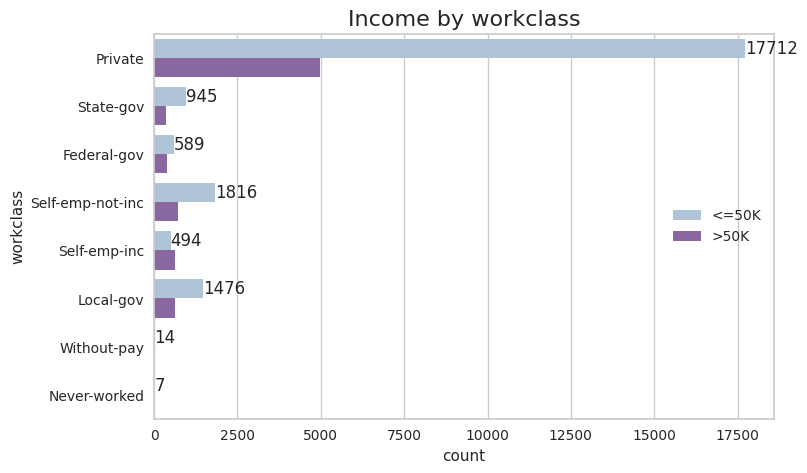

In [65]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['workclass'], hue = df['income'] , palette='BuPu')
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);
ax.legend(loc='center right')

- Distribution of income levels (<=50K and >50K) across different work classes, indicating that the majority of individuals in the 'Private' work class earn <=50K.
- To fill the missing values in the 'workclass' feature, it is generally better to use the mode (most frequent value) because it maintains the distribution and the majority representation in the data. In this case, the mode is 'Private'.

In [66]:
df['workclass'] = df['workclass'].fillna('Private')

In [67]:
##Check missing values
missing_values(df)

,count,percentage
age,0,0.00
workclass,0,0.00
fnlwgt,0,0.00
education,0,0.00
education.num,0,0.00
marital.status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


### Handle Missing Values on the `occupation` Column

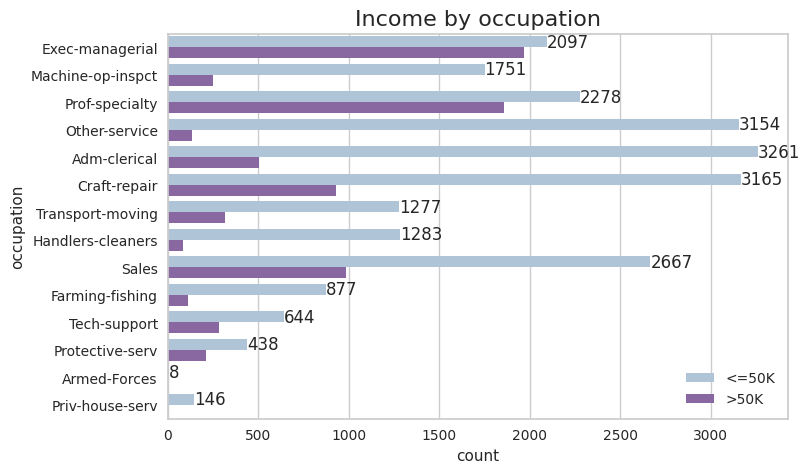

,count,percentage
age,0,0.00
workclass,0,0.00
fnlwgt,0,0.00
education,0,0.00
education.num,0,0.00
marital.status,0,0.00
occupation,0,0.00
relationship,0,0.00
race,0,0.00
sex,0,0.00


In [68]:
df['occupation'].value_counts(normalize=True)

plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['occupation'], hue = df['income'], palette='BuPu')
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0])
ax.legend(loc='lower right')
plt.show()

df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

#Check missing values
missing_values(df)

### Handle Missing Values on the `native country` Column

In [69]:
df['native.country'].value_counts(normalize=True)
df['native.country'].mode()[0]


# Filling any missing values (NaN) in the native.country column with "United-States" which is the mode.
df['native.country'] = df['native.country'].fillna('United-States')
#Check missing values
missing_values(df)

,count,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


<a id='Dimentionality reduction'></a>
## 1.4. Dimentionality reduction

- Reason: Columns like education and education.num are redundant because they represent the same information in different formats. Keeping one is sufficient to reduce dimensionality and computational cost.

- Action: Drop the education.num column.

In [70]:
df.head

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90   Private   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66   Private  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [71]:
# Visualize before and after for each step

print("\nColumns before dimensionality reduction:", df.columns)
print("Before handling missing values:")
print(df.head())  # Take a snapshot of the original data

df.drop(columns=['education.num'], inplace=True)
print("Columns after dimensionality reduction:", df.columns)

# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

print("After handling missing values and duplicates:")
print(df.head())  # Snapshot after preprocessing




Columns before dimensionality reduction: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
Before handling missing values:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  

<a id='Clustering'></a>
## 1.5. K-means Clustering

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# View the dataset
print(df.head())


# Step 1: Encode the 'income' column
label_encoder = LabelEncoder()
df['income_encoded'] = label_encoder.fit_transform(df['income'])

# Step 2: Determine the number of clusters based on the unique encoded values in the income column
n_clusters = df['income_encoded'].nunique()  # This should be 2 clusters



   age workclass  fnlwgt     education marital.status         occupation  \
0   90   Private   77053       HS-grad        Widowed     Prof-specialty   
1   82   Private  132870       HS-grad        Widowed    Exec-managerial   
2   66   Private  186061  Some-college        Widowed     Prof-specialty   
3   54   Private  140359       7th-8th       Divorced  Machine-op-inspct   
4   41   Private  264663  Some-college      Separated     Prof-specialty   

    relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  native.country income  
0  United-States  <=50K  
1  United-States

In [73]:
# Step 3: Drop the 'income' and 'income_encoded' columns to exclude the target class from clustering features
df_features = df.drop(columns=['income', 'income_encoded'])


# Step 4: Encode categorical features using one-hot encoding
df_features = pd.get_dummies(df_features)

# Step 5: Apply K-means clustering with the determined number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Set random_state for reproducibility
kmeans.fit(df_features)  # Fit the model to the data without the target column

# Step 6: Report the centroid values of each cluster
centroids = kmeans.cluster_centers_
print("Centroid values for each cluster:\n", centroids)

# Step 7: Report the number of instances in each cluster
labels, counts = np.unique(kmeans.labels_, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Cluster {label}: {count} instances")

# Optional: Display the clustering results if you want to add cluster labels to the original data
df['cluster'] = kmeans.labels_  # Add the cluster labels to the original DataFrame
print("\nSample data with cluster labels:\n", df.head())

Centroid values for each cluster:
 [[ 3.91422496e+01  1.42332300e+05  1.08894917e+03  8.96218928e+01
   4.05016104e+01  2.91105789e-02  6.43736064e-02  2.06458006e-04
   7.48781898e-01  3.67082335e-02  8.04360393e-02  3.98876868e-02
   4.95499215e-04  2.78305393e-02  3.42720291e-02  1.24700636e-02
   3.79882732e-03  7.92798745e-03  1.92418862e-02  1.52366009e-02
   3.25377818e-02  4.31497233e-02  1.66033529e-01  1.29242712e-02
   3.26905607e-01  5.60327029e-02  1.11487323e-03  1.79618466e-02
   2.22561731e-01  1.39689487e-01  7.01957222e-04  4.66677678e-01
   1.29242712e-02  3.17491122e-01  2.94822033e-02  3.30332810e-02
   1.15740358e-01  2.47749608e-04  1.24370303e-01  1.28994962e-01
   3.06383682e-02  4.02180197e-02  6.15657775e-02  1.00792799e-01
   4.21174333e-03  1.85853497e-01  1.90354282e-02  1.12395739e-01
   2.82021637e-02  4.77330911e-02  4.09571393e-01  2.50474853e-01
   2.79544141e-02  1.55710628e-01  1.05541333e-01  5.07473780e-02
   1.12313156e-02  3.47262367e-02  8.0353

<a id='Naive Bayes'></a>
## 1.6. Naive Bayes

In [74]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_encoded,cluster
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,0
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,0
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,1


Classification Report:
              precision    recall  f1-score      support
0              0.817793  0.948095  0.878137  7456.000000
1              0.653846  0.316999  0.426986  2306.000000
accuracy       0.799017  0.799017  0.799017     0.799017
macro avg      0.735819  0.632547  0.652561  9762.000000
weighted avg   0.779065  0.799017  0.771565  9762.000000

Weighted Average Metrics:
Precision: 0.7791
Recall (TP Rate): 0.7990
F-Measure: 0.7716

Confusion Matrix:
[[7069  387]
 [1575  731]]


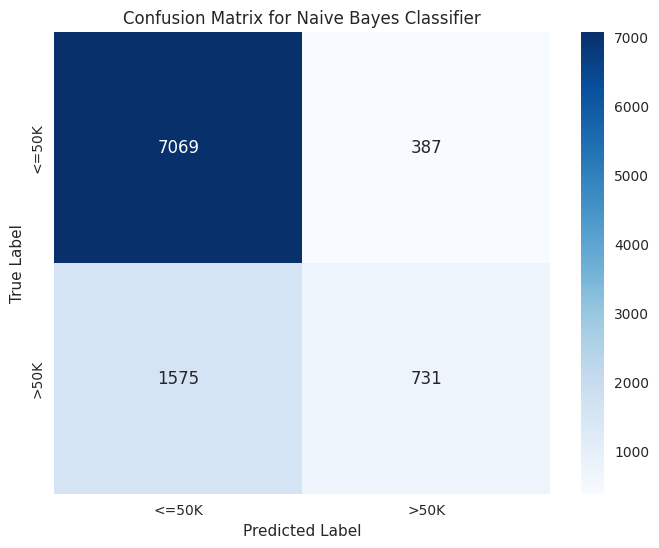


Dataset Information:
Total number of instances: 32537
Number of features used: 12

Feature names:
1. age
2. fnlwgt
3. capital.gain
4. capital.loss
5. hours.per.week
6. education
7. marital.status
8. occupation
9. relationship
10. race
11. sex
12. native.country

Class Distribution:
income_encoded
0    75.907428
1    24.092572
Name: proportion, dtype: float64


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Identify numeric and categorical columns
numeric_columns = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_columns = ['education', 'marital.status', 'occupation', 'relationship', 
                      'race', 'sex', 'native.country']

# Create a copy of the dataframe
df_encoded = df.copy()

# Step 2: Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df[column])

# Step 3: Prepare features and target
# Keep only numeric and encoded categorical columns
X = df_encoded[numeric_columns + categorical_columns]
y = df_encoded['income_encoded']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = nb_model.predict(X_test)

# Step 7: Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Step 8: Print weighted average metrics
weighted_avg = report['weighted avg']
print("\nWeighted Average Metrics:")
print(f"Precision: {weighted_avg['precision']:.4f}")
print(f"Recall (TP Rate): {weighted_avg['recall']:.4f}")
print(f"F-Measure: {weighted_avg['f1-score']:.4f}")

# Step 9: Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 10: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

# Print additional information
print("\nDataset Information:")
print(f"Total number of instances: {len(df_encoded)}")
print(f"Number of features used: {len(X.columns)}")
print("\nFeature names:")
for i, col in enumerate(X.columns, 1):
    print(f"{i}. {col}")

# Print class distribution
print("\nClass Distribution:")
print(df_encoded['income_encoded'].value_counts(normalize=True).multiply(100))

<a id='Outliers'></a>
## 1.7. Outliers

In [76]:
df.head(3)

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_encoded,cluster
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,0
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,0


Step 1: Data Preprocessing
--------------------------------------------------
Original dataset size: 32537 instances

Step 2: Outlier Detection
--------------------------------------------------

Outlier Analysis for age:
Q1: 28.00
Q3: 48.00
IQR: 20.00
Outlier boundaries: (-2.00, 78.00)
Extreme boundaries: (-32.00, 108.00)
Number of outliers: 142
Number of extreme values: 0

Outlier Analysis for fnlwgt:
Q1: 117827.00
Q3: 236993.00
IQR: 119166.00
Outlier boundaries: (-60922.00, 415742.00)
Extreme boundaries: (-239671.00, 594491.00)
Number of outliers: 993
Number of extreme values: 152

Outlier Analysis for capital.gain:
Q1: 0.00
Q3: 0.00
IQR: 0.00
Outlier boundaries: (0.00, 0.00)
Extreme boundaries: (0.00, 0.00)
Number of outliers: 2712
Number of extreme values: 2712

Outlier Analysis for capital.loss:
Q1: 0.00
Q3: 0.00
IQR: 0.00
Outlier boundaries: (0.00, 0.00)
Extreme boundaries: (0.00, 0.00)
Number of outliers: 1519
Number of extreme values: 1519

Outlier Analysis for hours.per.week:

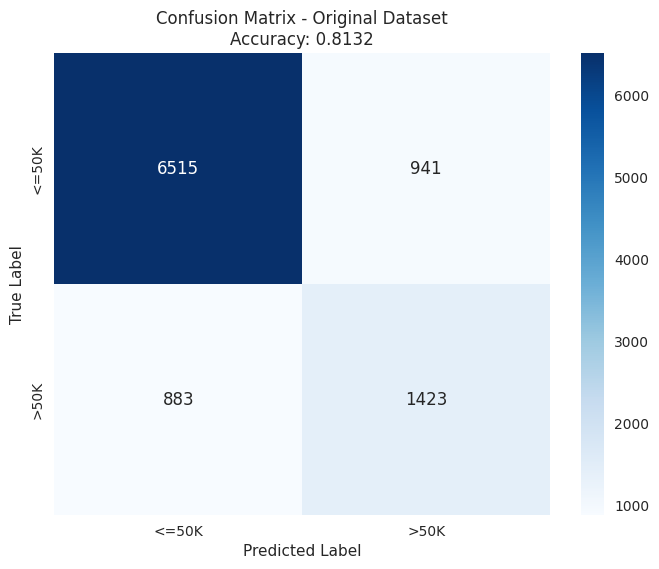


Dataset without Outliers:


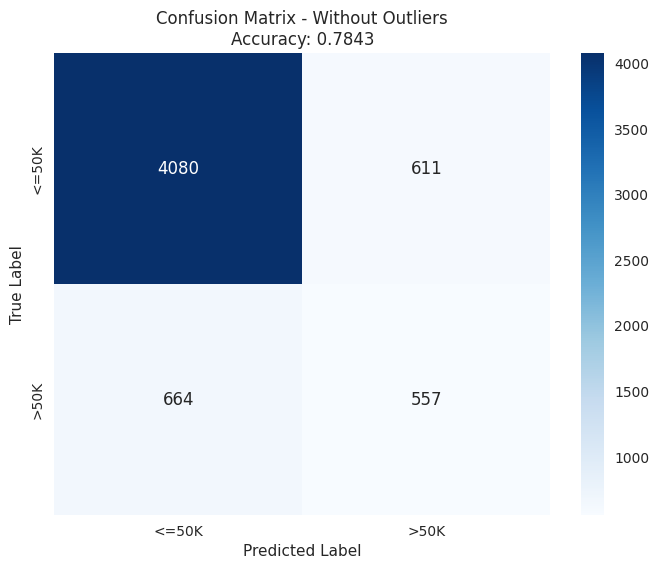


Dataset without Extreme Values:


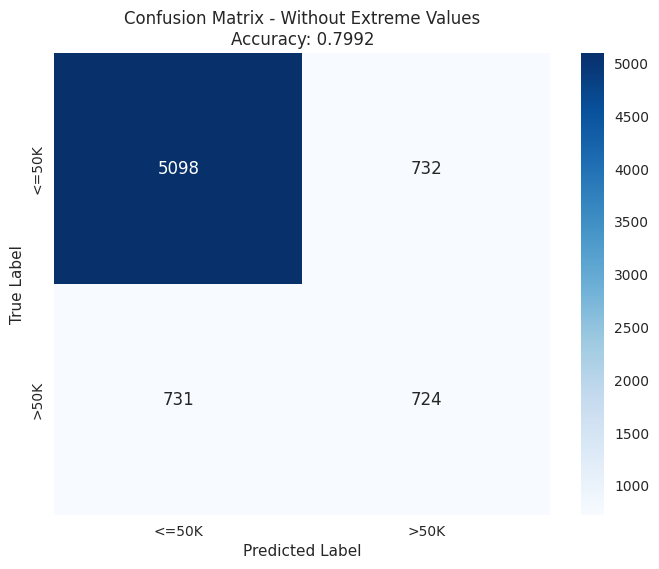


Step 4: Comparative Analysis
--------------------------------------------------
Original Dataset: 32537 instances, Accuracy: 0.8132
Without Outliers: 19706 instances, Accuracy: 0.7843
Without Extreme Values: 24281 instances, Accuracy: 0.7992


In [78]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    """
    Preprocess the dataset by encoding categorical variables
    """
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Identify categorical columns (exclude numeric columns and target)
    categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 
                           'relationship', 'race', 'sex', 'native.country']
    
    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_columns:
        df_processed[column] = le.fit_transform(df_processed[column])
    
    return df_processed

def detect_outliers_iqr(df):
    """
    Detect outliers and extreme values using IQR method for numeric columns
    """
    # Only select numeric columns
    numeric_columns = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
    
    outlier_indices = set()
    extreme_indices = set()
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Outlier boundaries (1.5 * IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Extreme boundaries (3 * IQR)
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR
        
        # Find outliers and extreme values
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        extreme = df[(df[column] < extreme_lower) | (df[column] > extreme_upper)].index
        
        print(f"\nOutlier Analysis for {column}:")
        print(f"Q1: {Q1:.2f}")
        print(f"Q3: {Q3:.2f}")
        print(f"IQR: {IQR:.2f}")
        print(f"Outlier boundaries: ({lower_bound:.2f}, {upper_bound:.2f})")
        print(f"Extreme boundaries: ({extreme_lower:.2f}, {extreme_upper:.2f})")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Number of extreme values: {len(extreme)}")
        
        outlier_indices.update(outliers)
        extreme_indices.update(extreme)
    
    return outlier_indices, extreme_indices

def evaluate_j48(X, y, title):
    """
    Train and evaluate J48 (Decision Tree) classifier
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    j48 = DecisionTreeClassifier(criterion='entropy', random_state=42)
    j48.fit(X_train, y_train)
    
    y_pred = j48.predict(X_test)
    
    # Calculate accuracy and create confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['<=50K', '>50K'],
                yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix - {title}\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return accuracy, conf_matrix, len(X)

# Main analysis pipeline
print("Step 1: Data Preprocessing")
print("-" * 50)

# Preprocess the original dataset
df_processed = preprocess_data(df)
print(f"Original dataset size: {len(df_processed)} instances")

# Detect outliers and extreme values
print("\nStep 2: Outlier Detection")
print("-" * 50)
outlier_indices, extreme_indices = detect_outliers_iqr(df_processed)

# Create datasets without outliers and extreme values
df_no_outliers = df_processed.drop(index=outlier_indices)
df_no_extreme = df_processed.drop(index=extreme_indices)

print(f"\nNumber of outliers removed: {len(outlier_indices)}")
print(f"Number of extreme values removed: {len(extreme_indices)}")

# Prepare features and target for each dataset
X_columns = [col for col in df_processed.columns if col not in ['income', 'income_encoded']]
X_original = df_processed[X_columns]
y_original = df_processed['income_encoded']

X_no_outliers = df_no_outliers[X_columns]
y_no_outliers = df_no_outliers['income_encoded']

X_no_extreme = df_no_extreme[X_columns]
y_no_extreme = df_no_extreme['income_encoded']

# Evaluate each dataset
print("\nStep 3: J48 Classification Results")
print("-" * 50)

print("\nOriginal Dataset:")
orig_acc, orig_conf, orig_count = evaluate_j48(X_original, y_original, "Original Dataset")

print("\nDataset without Outliers:")
no_out_acc, no_out_conf, no_out_count = evaluate_j48(X_no_outliers, y_no_outliers, "Without Outliers")

print("\nDataset without Extreme Values:")
no_ext_acc, no_ext_conf, no_ext_count = evaluate_j48(X_no_extreme, y_no_extreme, "Without Extreme Values")

# Print comparative results
print("\nStep 4: Comparative Analysis")
print("-" * 50)
print(f"Original Dataset: {orig_count} instances, Accuracy: {orig_acc:.4f}")
print(f"Without Outliers: {no_out_count} instances, Accuracy: {no_out_acc:.4f}")
print(f"Without Extreme Values: {no_ext_count} instances, Accuracy: {no_ext_acc:.4f}")